In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 텍스트 분류 - 뉴스
---
- scklearn.datasets

## [1] 데이터 준비
---

In [2]:
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
newsData = fetch_20newsgroups()

In [4]:
newsData.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
print(f"data => {len(newsData['data'])}")

data => 11314


In [6]:
newsData20 = newsData['data']

In [7]:
type(newsData20)

list

In [8]:
print(newsData20[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [9]:
## 타겟 데이터 확인
target = newsData['target']
type(target)

numpy.ndarray

In [10]:
print(f"target => {len(newsData['target_names'])}개")
for name in newsData['target_names']:
  print(name)
print(f'target => {target}')

target => 20개
alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc
target => [7 4 4 ... 3 1 8]


#### 순서
- (1) 사전 생성  
  - 소문자 통일  
  - 불용어 처리  
- (2) 수치로 변환  
- (3) 데이터 길이, 사용단어 개수 설정
- (4) 원핫인코딩
- (5) 모델 구축

## [2] 데이터 전처리 
---
- (1) 수집 데이터 기반 단어사전 생성
- (2) 텍스트 데이터 => 수치 데이터 변환
- (3) 데이터 길이 결정
- (4) 2진 정수화 변환


In [11]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

### nltk 방식으로 불용어 제거
---


In [12]:
# 불용어 처리

# 불용어 리스트
stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(stopwords)|{'"\"','~','`','!','@','#','$','%','^','&','*','(',')','_','-','+','=',':',';','?','/','>'}


In [13]:
word_before = set()
word_list = set()

# 전체글 -> 문단
for paragraph in newsData20:
  words = word_tokenize(paragraph)

  for word in words:
    word_before.add(word)

    if word not in stopwords:
      word_list.add(word)
      

print('불용어 처리전:',len(word_before))
print('불용어 처리후:',len(word_list))
print(word_list)

Output hidden; open in https://colab.research.google.com to view.

### Tokenizer 방식으로 불용어 제거

In [14]:
myToken = Tokenizer(num_words=300)

In [15]:
# 단어사전(voca) 생성
myToken.fit_on_texts(newsData20)

In [16]:
# 생성된 사전 => 빈도 높은 순
print('voca개수:',len(myToken.word_index))
print(myToken.word_index)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
print(myToken.word_counts)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
myToken.filters

'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'

In [19]:
myToken.word_index.keys()

dict_keys(['the', 'to', 'of', 'a', "'ax", 'and', 'in', 'i', 'is', 'that', 'it', 'for', 'you', 'from', 'edu', 'on', 'this', 'be', 'are', 'not', 'have', 'with', 'as', '1', 'or', 'was', 'if', 'but', 'subject', 'they', 'com', 'lines', 'at', 'organization', 'by', '2', 'an', 'my', 'can', 'x', '3', 'what', '0', 'all', 'will', 'm', 'there', 'would', 'one', 'do', "'", 'about', 're', 'we', 'writes', 'so', 'he', 'your', 'no', 'has', 'article', 'any', 'me', 'some', 'who', 'out', 'which', '4', 'q', 'more', 'like', 'people', "don't", 'when', '5', 'just', 'university', 'posting', 'their', 'were', 'up', 'r', 'p', 'w', 'how', 'other', '7', 'know', 's', 'only', 'host', 'get', 'c', 'them', 'nntp', 'max', 'than', 'had', 'think', 'g', 'been', 'his', '8', 'o', 'also', '6', 'use', 'does', 'time', 'new', 'then', 'e', "it's", 'good', "i'm", 'these', 'd', 'u', 'should', '9', 'ca', 'n', 'could', 'well', 'us', 'because', 'am', 'b', 'may', 't', 'even', 'why', 'very', 'now', 'into', 'see', 'cs', 'two', 'way', 'v', 

In [20]:
for key in myToken.word_index.keys():
  print(f'{key}: {myToken.word_counts[key]}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
71m: 1
jqrpz9: 1
0nr: 1
llfu: 1
y3kf: 1
0pf: 1
vug: 1
8a6ir6u: 1
lqel0u7: 1
iyajjz: 1
iaf6: 1
m1iz: 1
c1pp: 1
8c6: 1
cu5: 1
lnh: 1
z3k1jza: 1
gqevzd: 1
tcny2d96z5: 1
1f0ut5: 1
dzu: 1
c208c: 1
qldy52: 1
h'y: 1
gua6crsgv: 1
d1d: 1
mbv5s: 1
tr2y: 1
e0z: 1
'pcr3: 1
cl5: 1
012i: 1
mi4nguvm: 1
j70s7c3ctc: 1
v8v4: 1
imq4g: 1
c74: 1
7lbfa: 1
iel: 1
eeht: 1
x9f: 1
0hnz: 1
23ln: 1
h55: 1
jwo4ee: 1
sqo: 1
4t'l7q: 1
g42: 1
5lx: 1
stg: 1
779g9nbox'1: 1
p18jm2l: 1
'5nw32: 1
uqvcan7x: 1
8vqj9a: 1
x6sx: 1
yfctb: 1
0sn: 1
30aar: 1
0kd: 1
60r: 1
m626tq0: 1
388h: 1
t1'z: 1
3h3: 1
tutxp: 1
myk0u: 1
kiyl4: 1
pcv'8egg4u6: 1
'g5: 1
mzxe: 1
wj4d9: 1
ixc: 1
riuyw'21rd: 1
nh9p3n: 1
ashg8: 1
8a15u: 1
7cdf: 1
kbjg0: 1
yfxx: 1
ylw: 1
5wyioxe: 1
g0x: 1
at'b: 1
02njp: 1
t8jk: 1
ym7p4: 1
fbsy: 1
g5ov: 1
1rk1: 1
ev1: 1
3ia4'k4: 1
dpn: 1
cb05nn: 1
td36: 1
ltgy: 1
lmq: 1
ilif3: 1
hm3: 1
hyimb: 1
3kp: 1
'0f2: 1
dyh: 1
wh9vsu: 1
m3q: 1
fvhjia: 1
xuacure: 1
h6f: 1
iab4: 1
'xdu: 1
vn4f: 1

# [2] 수치화
---

In [21]:
seq_news = myToken.texts_to_sequences(newsData20)
print(seq_news[0])

[14, 15, 38, 250, 29, 42, 298, 9, 17, 95, 78, 91, 15, 34, 77, 3, 32, 211, 8, 26, 27, 171, 66, 47, 123, 63, 16, 17, 298, 8, 1, 86, 263, 11, 26, 4, 36, 298, 2, 18, 14, 1, 11, 26, 4, 1, 80, 182, 7, 1, 26, 14, 1, 3, 1, 17, 9, 44, 8, 88, 27, 171, 39, 4, 273, 198, 3, 153, 17, 298, 9, 239, 25, 13, 21, 16, 17, 298, 181, 112, 188, 206, 2, 13, 35, 58]


In [22]:
count=[]
for i in seq_news:
  count.append(len(i))

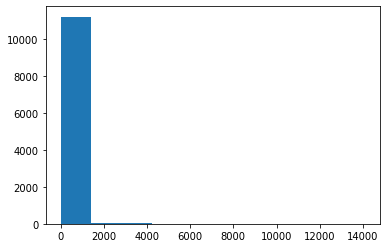

In [23]:
import matplotlib.pyplot as plt
plt.hist(count)
plt.show()

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 패딩
---

In [25]:
# [2-1] 데이터별 길이 결정 : 300개
train_seq = pad_sequences(seq_news,maxlen=300)

# 원핫
---

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
train_oh = to_categorical(train_seq)

# test,train
---

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_val, y_train, y_val = train_test_split(train_oh,target)

In [30]:
print(f'X_train: {X_train.shape} ,X_val : {X_val.shape}')
print(f'y_train: {y_train.shape} ,y_val : {y_val.shape}')

X_train: (8485, 300, 300) ,X_val : (2829, 300, 300)
y_train: (8485,) ,y_val : (2829,)


# model
---

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [40]:
model = Sequential()
model.add(SimpleRNN(8, input_shape=(300,300),return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(1,activation = 'softmax'))

# simpleRNN층을 추가하면 return_sequences=True를 해줘야 다음 층이 같은 Shape을 입력받을 수 있음


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 300, 8)            2472      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,889
Trainable params: 2,889
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
his = model.fit(X_train,y_train,epochs=3, validation_data=(X_val,y_val))

Epoch 1/3
266/266 [==============================] - 103s 381ms/step - loss: 0.0000e+00 - accuracy: 0.0544 - val_loss: 0.0000e+00 - val_accuracy: 0.0431
Epoch 2/3
266/266 [==============================] - 99s 373ms/step - loss: 0.0000e+00 - accuracy: 0.0544 - val_loss: 0.0000e+00 - val_accuracy: 0.0431
Epoch 3/3
266/266 [==============================] - 99s 370ms/step - loss: 0.0000e+00 - accuracy: 0.0544 - val_loss: 0.0000e+00 - val_accuracy: 0.0431


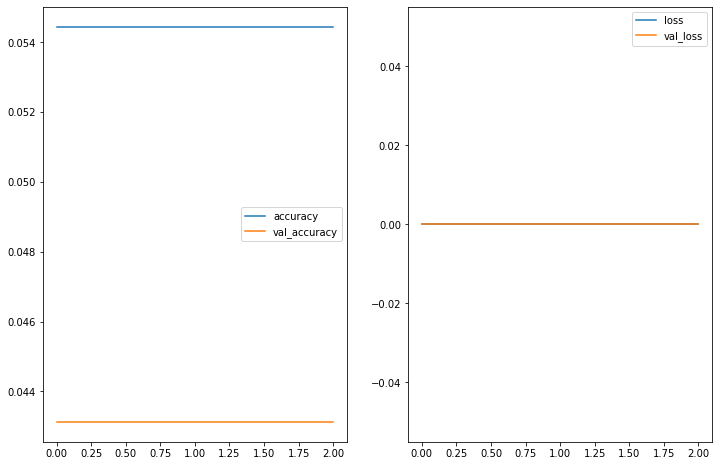

In [44]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['val_accuracy'], label ='val_accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(his.history['loss'],label='loss')
plt.plot(his.history['val_loss'],label='val_loss')
plt.legend()
plt.show()